In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score,GridSearchCV,learning_curve,train_test_split,validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('fivethirtyeight')
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [2]:
df['price'] = boston.target

In [3]:
# read first five rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# check the shape
df.shape

(506, 14)

In [5]:
# check the dtypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [6]:
# check the unique values in CHAS column
np.unique(df['CHAS'])

array([0., 1.])

In [7]:
# check the NaN values in data set
print(df.isnull().sum())
print('\n\n so,there is not any null values')

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64


 so,there is not any null values


# Graphical analysis of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159A4C64700>,
      dtype=object)

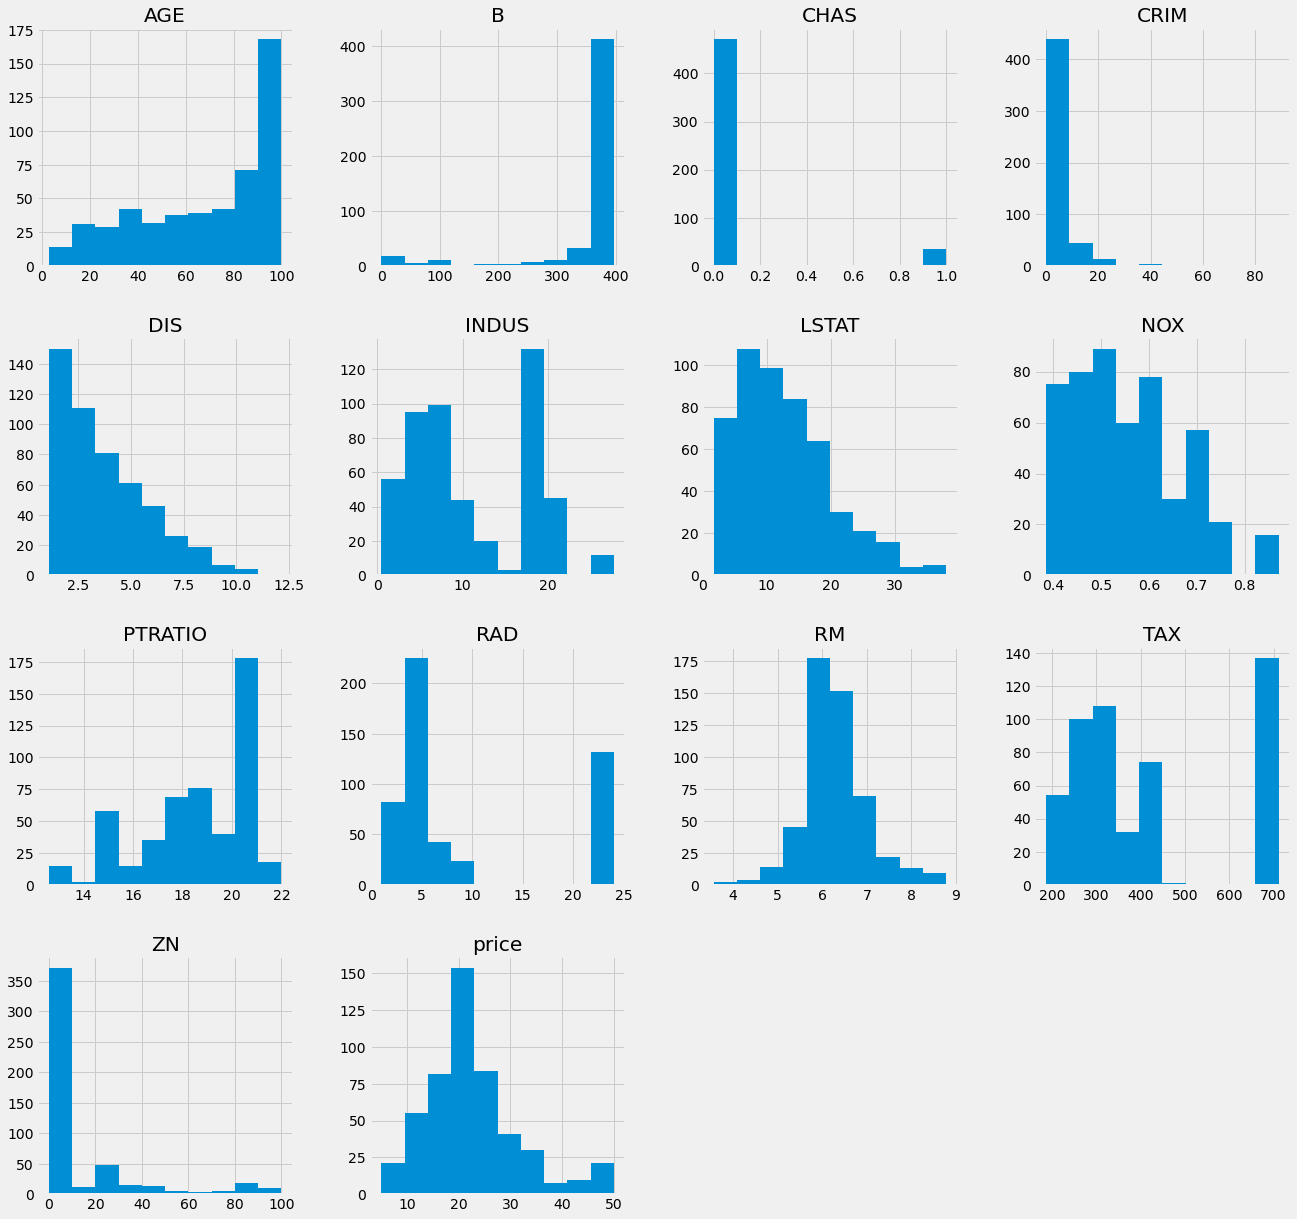

In [8]:
# check the distribution of data set
df.hist(figsize=(20,20))

so here the some columns in data is not normally distributed

### let's see the relation b/w features & target variables

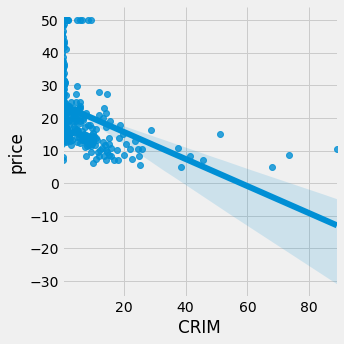

In [9]:
sns.lmplot('CRIM','price',data=df)

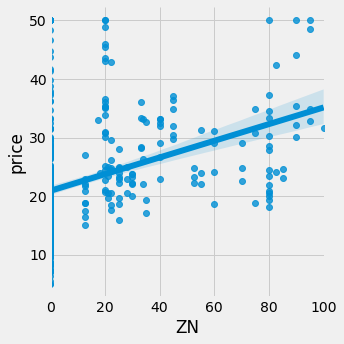

In [10]:
sns.lmplot('ZN','price',data=df)

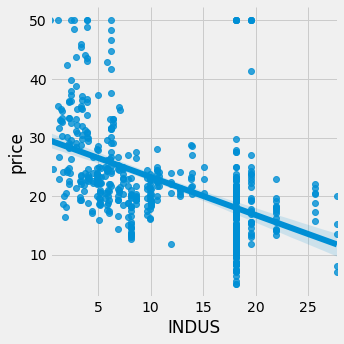

In [11]:
sns.lmplot('INDUS','price',data=df)

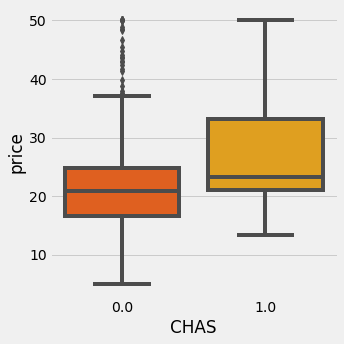

In [12]:
sns.catplot('CHAS','price',data=df,kind='box',palette='autumn')

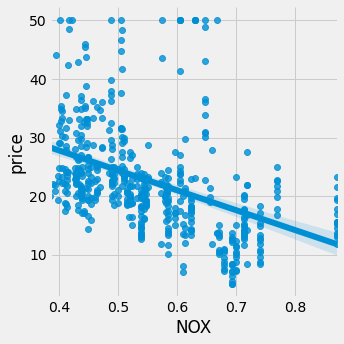

In [13]:
sns.lmplot('NOX','price',data=df)

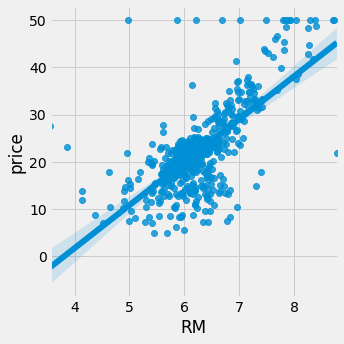

In [14]:
sns.lmplot('RM','price',data=df)

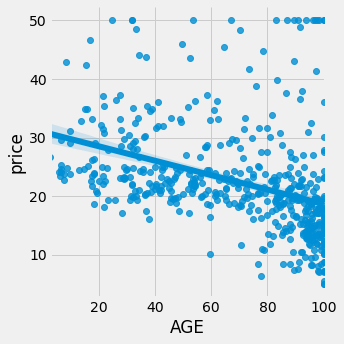

In [15]:
sns.lmplot('AGE','price',data=df)

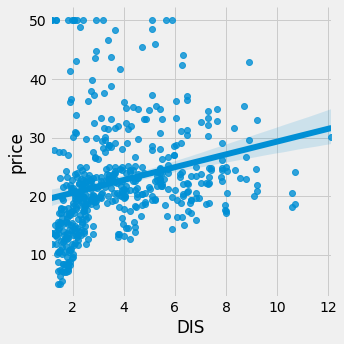

In [16]:
sns.lmplot('DIS','price',data=df)

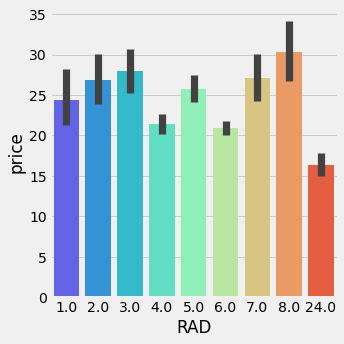

In [17]:
sns.catplot('RAD','price',data=df,kind='bar',palette='rainbow')

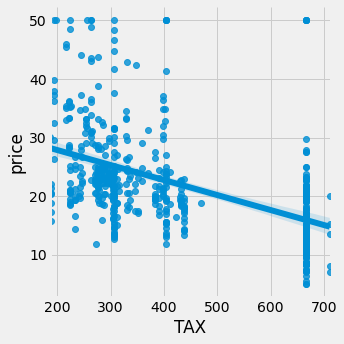

In [18]:
sns.lmplot('TAX','price',data=df)

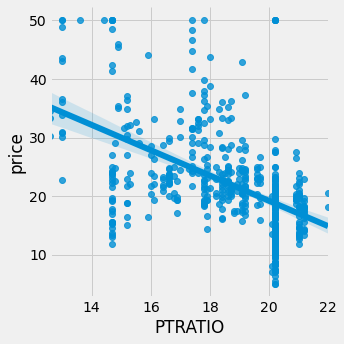

In [19]:
sns.lmplot('PTRATIO','price',data=df)

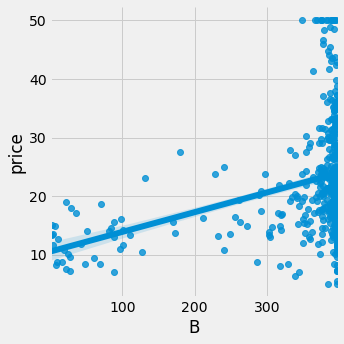

In [20]:
sns.lmplot('B','price',data=df)

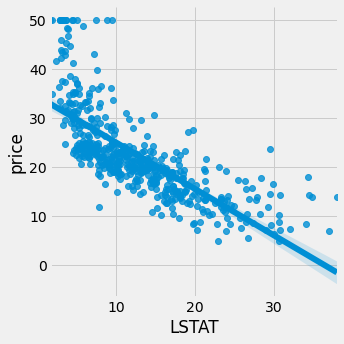

In [21]:
sns.lmplot('LSTAT','price',data=df)

### statistical analysis

In [22]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


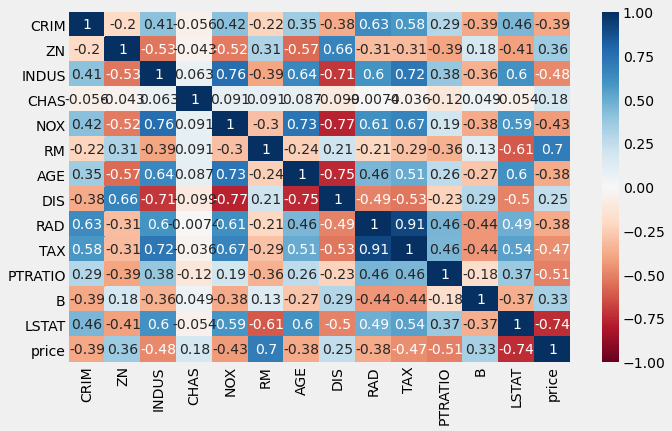

In [23]:
# checking the heatmap of correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,center=0,cmap='RdBu',vmin=-1.0)

In [24]:
# separate the data into feature & target

x = df.drop(['price'],axis=1)
y = df['price']

In [25]:
# use the standar scale to normalize the data

scaler = StandardScaler()

xscaled = scaler.fit_transform(x)

In [26]:
# check the VARIANCE INFLATION FACTOR

vif =pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xscaled,i) for i in range(x.shape[1])]
vif['feature'] = x.columns
print(vif)


print("\n\n so we  will remove the TAX column because it's having very high inflation factor")

         VIF  feature
0   1.792192     CRIM
1   2.298758       ZN
2   3.991596    INDUS
3   1.073995     CHAS
4   4.393720      NOX
5   1.933744       RM
6   3.100826      AGE
7   3.955945      DIS
8   7.484496      RAD
9   9.008554      TAX
10  1.799084  PTRATIO
11  1.348521        B
12  2.941491    LSTAT


 so we  will remove the TAX column because it's having very high inflation factor


In [27]:
x.drop(['TAX'],axis=1,inplace=True)

In [28]:
# Again we will standardized the data
xscaled=scaler.fit_transform(x)

In [29]:
# now again checking variance_inflation_factor
vif =pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(xscaled,i) for i in range(x.shape[1])]
vif['feature'] = x.columns
print(vif)

print('\n now all the features has low VIF')

         VIF  feature
0   1.791940     CRIM
1   2.184240       ZN
2   3.226015    INDUS
3   1.058220     CHAS
4   4.369271      NOX
5   1.923075       RM
6   3.098044      AGE
7   3.954446      DIS
8   2.837494      RAD
9   1.788839  PTRATIO
10  1.347564        B
11  2.940800    LSTAT

 now all the features has low VIF


In [30]:
# do train_test_split for model building & Evalution

xtrain,xtest,ytrain,ytest = train_test_split(xscaled,y,test_size=.20,random_state=11)

In [31]:
# check the shape of splits
print('xtrain shape : ', xtrain.shape)
print('xtest shape : ', xtest.shape)
print('ytrain shape : ', ytrain.shape)
print('ytest shape : ', ytest.shape)

xtrain shape :  (404, 12)
xtest shape :  (102, 12)
ytrain shape :  (404,)
ytest shape :  (102,)


In [32]:
# create model function
def model(lr):
    reg = lr.fit(xtrain,ytrain)
    ytrain_predict = reg.predict(xtrain)
    ytest_predict = reg.predict(xtest)
    print('\n train score =', reg.score(xtrain,ytrain))
    print('\ntest score =',reg.score(xtest,ytest))
    print('\nRMSE of train', np.sqrt(mean_squared_error(ytrain,ytrain_predict)))
    print('\nRMSE of test', np.sqrt(mean_squared_error(ytest,ytest_predict)))

In [33]:
model(LinearRegression())


 train score = 0.7465087544698018

test score = 0.6766140247110054

RMSE of train 4.61391798830868

RMSE of test 5.267426288560038


In [34]:
model(Ridge())


 train score = 0.7465011094674279

test score = 0.6768317832518204

RMSE of train 4.613987562995475

RMSE of test 5.265652525458567


In [35]:
model(Lasso())


 train score = 0.671111917667557

test score = 0.6448625050422647

RMSE of train 5.255480830951844

RMSE of test 5.519962656890274


In [36]:
model(ElasticNet())


 train score = 0.6529865803456179

test score = 0.6374473455096685

RMSE of train 5.398356024546118

RMSE of test 5.577292490332708


### now do model building & evalution using Cross validation

In [37]:
# create cross Validation function

def cross_validation(lr):
    score = cross_val_score(lr,xscaled,y,cv=7)
    RMSE = cross_val_score(lr,xscaled,y,cv=7,scoring='neg_root_mean_squared_error')
    print(lr)
    print('score = ', np.mean(score))
    print('RMSE = ' ,np.mean(-RMSE))

In [38]:
cross_validation(LinearRegression())

LinearRegression()
score =  0.43022248402637836
RMSE =  5.409511971391614


In [39]:
cross_validation(Ridge())

Ridge()
score =  0.43528851631991167
RMSE =  5.387688364835306


In [40]:
cross_validation(Lasso())

Lasso()
score =  0.38508755957954854
RMSE =  5.672818327795077


In [41]:
cross_validation(ElasticNet())

ElasticNet()
score =  0.4098025224866393
RMSE =  5.603140339768163


# so by these above model we are getting best accuracy by Ridge() model,let's plot validation curve on different variation of alpha hyper parameter

### plot the validation curve

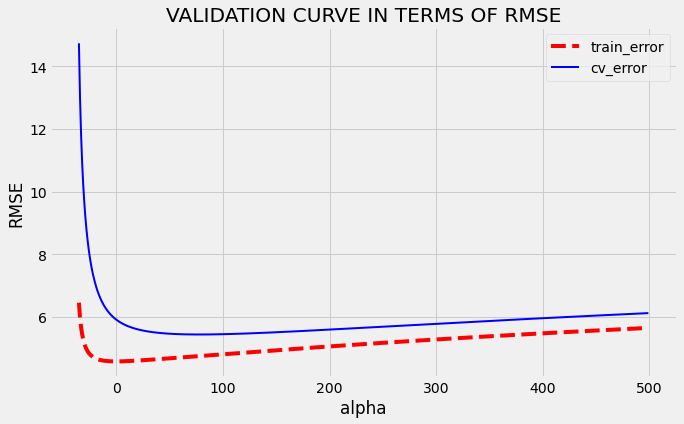

In [42]:
param = range(-35,500)
train_error , cv_error = validation_curve(Ridge(),xscaled,y,param_name='alpha',param_range=param,scoring='neg_root_mean_squared_error')

mean_train_error = np.mean(-train_error,axis=1)
mean_cv_error = np.mean(-cv_error,axis=1)

plt.figure(figsize=(10,6))
plt.plot(param,mean_train_error,'r--',label='train_error')
plt.plot(param,mean_cv_error,'b',label='cv_error',linewidth=2)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("VALIDATION CURVE IN TERMS OF RMSE")
plt.legend()

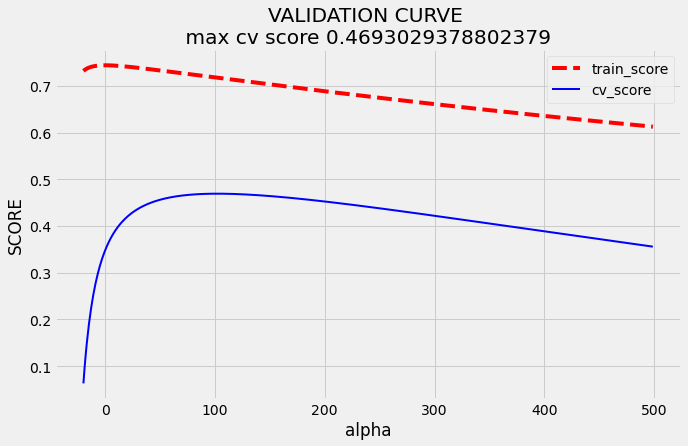

In [43]:
param = range(-20,500)
train_score , cv_score = validation_curve(Ridge(),xscaled,y,param_name='alpha',param_range=param)


mean_train_score = np.mean(train_score,axis=1)
mean_cv_score = np.mean(cv_score,axis=1)

plt.figure(figsize=(10,6))
plt.plot(param,mean_train_score,'r--',label='train_score')
plt.plot(param,mean_cv_score,'b',label='cv_score',linewidth=2)
plt.xlabel('alpha')
plt.ylabel('SCORE')
plt.title("VALIDATION CURVE \n max cv score {} ".format(np.max(mean_cv_score)))
plt.legend()

### CONCLUSION : WE WILL SELECT THAT VALUE OF ALPHA HYPERPARAMETER WHERE EITHER CV ERROR IS MINIMUM OR CV SCORE IS MAXIMUM

### LEARNING CURVE

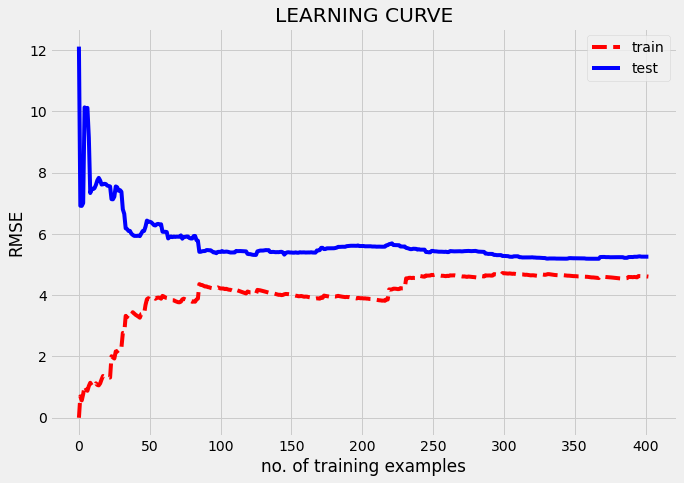

In [44]:
plt.figure(figsize=(10,7))
train_error = []
test_error = []
for i in range(1,len(xtrain)):
    lr=Ridge().fit(xtrain[:i],ytrain[:i])
    ytrainpred = lr.predict(xtrain[:i])
    ytestpred = lr.predict(xtest)
    train_error.append(mean_squared_error(ytrain[:i],ytrainpred))
    test_error.append(mean_squared_error(ytest,ytestpred))
plt.plot(np.sqrt(train_error),'r--',label='train')
plt.plot(np.sqrt(test_error),'b',label='test')
plt.xlabel('no. of training examples')
plt.ylabel('RMSE')
plt.title('LEARNING CURVE')
plt.legend()

### CONCLUSION : SO OUR MODEL FACING THE HIGH VARIANCE PROBLEM, SO GETTING MORE TRAINING DATA IS LIKELY TO HELP

In [45]:
# Let's do GRIDSEARCHCV METHOD TO GET BEST alpha hyperparameter to get better accuracy
# Let's do GRIDSEARCHCV METHOD TO GET BEST alpha hyperparameter to get better accuracy
param = {'alpha':np.linspace(1,100,1000)}
grid = GridSearchCV(Ridge(),param_grid=param)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([  1.        ,   1.0990991 ,   1.1981982 ,   1.2972973 ,
         1.3963964 ,   1.4954955 ,   1.59459459,   1.69369369,
         1.79279279,   1.89189189,   1.99099099,   2.09009009,
         2.18918919,   2.28828829,   2.38738739,   2.48648649,
         2.58558559,   2.68468468,   2.78378378,   2.88288288,
         2.98198198,   3.08108108,   3.18018018,   3.27927928,
         3.37837838,   3.47747748,   3.57657658,   3.675675...
        96.92792793,  97.02702703,  97.12612613,  97.22522523,
        97.32432432,  97.42342342,  97.52252252,  97.62162162,
        97.72072072,  97.81981982,  97.91891892,  98.01801802,
        98.11711712,  98.21621622,  98.31531532,  98.41441441,
        98.51351351,  98.61261261,  98.71171171,  98.81081081,
        98.90990991,  99.00900901,  99.10810811,  99.20720721,
        99.30630631,  99.40540541,  99.5045045 ,  99.6036036 ,
        99.7027027 ,  99.8018018 ,  99.9009009 , 100

In [46]:
final_model11 = grid.best_estimator_

In [47]:
Generalize_accuracy = final_model11.score(xtest,ytest)
Generalize_accuracy

0.6799480619358833

In [48]:
import pickle
pickle.dump(final_model11,open('final_model11.pickle','wb'))

In [49]:
loaded_model = pickle.load(open('final_model11.pickle','rb'))

In [50]:
price = loaded_model.predict(scaler.transform([['0.00632','18.0','2.31','0.0','0.538','6.575','65.2','4.0900','1.0','15.3','396.90','4.98']]))


price

array([30.53132866])